# Programming Machine Learning Lab
# Exercise 3

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_3.xxx"**
1. Complete all your tasks and then do a clean run before generating the final pdf. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

### Part 1

You are required to optimize the booth function using gradient descent. The Code below provides a visual representation of the booth function in a 3D plot. Mathematically, the function can be defined as follows.

$$f(x,y) = (x+2y)^2 + (2x+y-5)^2$$

Your tasks are to:
- Add proper axis/figure labels to the 3d plot provided.
- Derive the partial gradients.
- Create a function to perform Gradient Descent on the given equation, the function should take the initial values of $(x,y)$ and $\alpha$ as inputs. Initial value of (x,y) would be (-10,5) and the steplength $\alpha$ needs to be determined through trial and error. Once the $\alpha$ is finalized, plot the value of $Z$ over time as it is minimized using the gradient descent.
- Visualize the trajectory on a 3D plot. This trajectory should ideally lead to the function minimum. Try to plot the trajectory in a for loop so that the path taken is visible.

The GD algorithm is given below, where $\epsilon$ is a small float value like $10^{-3}$ or $10^{-5}$ and $i_{max}$ is the max number of iterations to perform. 


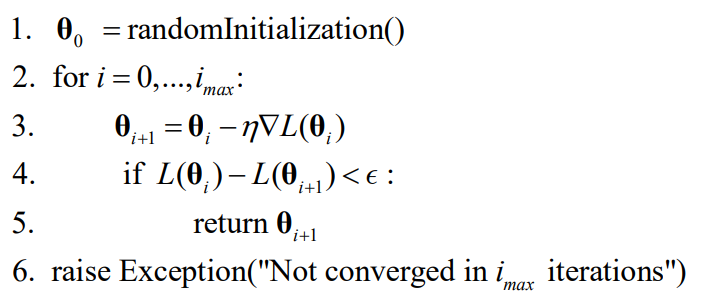

*(Note: If you prefer, you can use you a differnt code for plotting the 3d figure)*

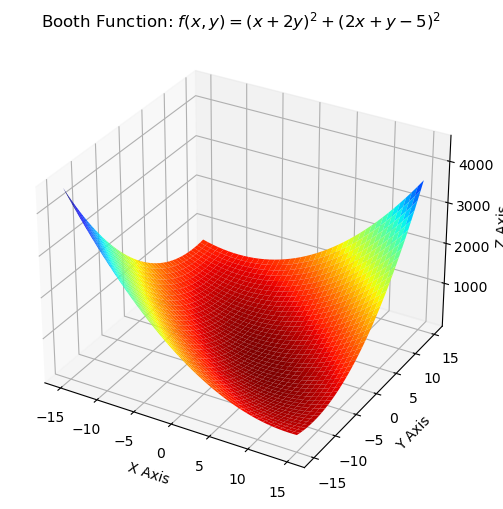

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
reso = 42
X = np.linspace(-15, 15, reso)
Y = np.linspace(-15, 15, reso)
X, Y = np.meshgrid(X, Y)
Z = (X+2*Y)**2 + (2*X+Y-5)**2

surf = ax.plot_surface(X, Y, Z, cmap='jet_r',
                       linewidth=0, antialiased=True)

#Part-1
# Adding labels to the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Booth Function: $f(x, y)=(x+2 y)^2+(2 x+y-5)^2$')

plt.show()

To find values of x and y which minimizes this function can be computed by taking the partial derivative of the function with respect to x and y
\
\
The partial derivative with respect to x is given as,
\
$f(x)^{\prime}=2(x+2 y) +2(2 x+y-5) \cdot 2 $
\
\
The partial derivative with respect to y is given as,
\
$f(y)^{\prime}=2(x+2 y) \cdot 2 +2(2 x+y-5) $

In [3]:
### write your code here

#function f(x,y)
def booth(x,y):
    return (x+2*y)**2+(2*x+y-5)**2

#partial derivative wrt x 
def derv_fx(x,y):
    return 2*(x+2*y) +2*(2*x+y-5)*2

#partial derivative wrt y
def derv_fy(x,y):
    return 2*(x+2*y)*2+2*(2*x+y-5)

def gradient_decent_booth(x,y,alpha):
    iterations = 0 ## for calculating number of iterations
    step_x = 1 ## arbitrary step length to start the loop for x
    step_y = 1 ## arbitrary step length to start the loop for y
    max_iter = 100 ## maximum iterations
    z_val = [booth(x,y)] #Tos tore the Z value/booth value as we optimize the function
    x_val = [x]
    y_val = [y]
    while (np.abs(step_x) > 1e-6) or (np.abs(step_y) > 1e-6): #iterate untill the value of function stops changing below 1e-6 

        #to stop our optimization if the function stops converging after certain number of iterations
        if iterations > max_iter:
            break

        ## for calculating steps wrt both x and y
        step_x = -lr*derv_fx(x,y)
        step_y = -lr*derv_fy(x,y)

        ## for minimizing x,y
        x = x + step_x
        y = y + step_y

        ## increment the iteration
        iterations += 1
        x_val.append(x)
        y_val.append(y)
        z_val.append(booth(x,y))

    return x,y,iterations,z_val,(x_val,y_val)

In [4]:
minimum = np.inf
for n in range(10): #number of trials and error steps
    x = -10 #given x value
    y = 5 #give y value
    lrs = [0.01,0.1,0.2,0.5] #bunch of practical random learning rates
    lr = lrs[np.random.randint(0,4,1)[0]] #pick a random lr from our given list of lr

    x, y, iterations, z, _ = gradient_decent_booth(x,y,lr) #gradient descent step
    new_f = z[-1] #new value of f with optimized x, y
    if new_f < minimum: #store the value of x,y which minimize the function most
        minimum = new_f
        best_alpha = lr
        optimized_x, optimized_y = x , y
        it = iterations
        z_val = z

In [5]:
print(f'The best alpha found after the trial and error is: {best_alpha}')

The best alpha found after the trial and error is: 0.1


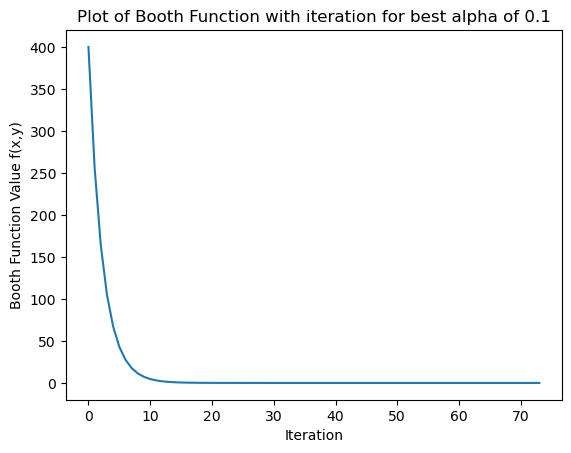

In [6]:
plt.plot(np.arange(it+1),z_val)
plt.xlabel('Iteration')
plt.ylabel('Booth Function Value f(x,y)')
plt.title(f'Plot of Booth Function with iteration for best alpha of {best_alpha}');

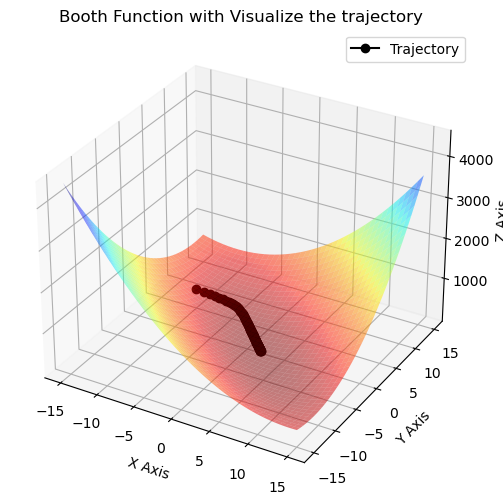

In [7]:
_, _, _, z_val, (x_v, y_v) = gradient_decent_booth(x=-10, y=5, alpha=0.1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
ax.plot(x_v, y_v, z_val, color='black', marker='o', label='Trajectory')

X = np.linspace(-15, 15, 42)
Y = np.linspace(-15, 15, 42)
X, Y = np.meshgrid(X, Y)
Z = (X+2*Y)**2 + (2*X+Y-5)**2

surf = ax.plot_surface(X, Y, Z, cmap='jet_r',
                       linewidth=0, antialiased=True, alpha=0.5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Booth Function with Visualize the trajectory')

# Update the legend and show the plot
ax.legend()
plt.show()

### Part 2

**Regression**

Implement learn a linear regression model using Normal Equations using the algorithm below.

$\textbf{learn-linreg-NormEq}$ ($D\_train:=\{ (x_1,y_1), \ldots, (x_N,y_N) \}$):<br>
    $X:= (x_1, x_2, \ldots, x_N)^T$ <br>
    $y:= (y_1, y_2, \ldots, y_N)^T$ <br>
    $A:= X^T X$ <br>
    $b:= X^T y$ <br>
    $\hat\beta:= \text{solve-SLE}(A, b)$ <br>
    return $\hat\beta$ <br>

For solving the Linear Equations (the function $\text{solve-SLE}$), implement either: 
-   Gaussian Elimination (implemented in pure python i.e., only NumPy).
-   QR decomposition (implemented in pure python i.e., only NumPy)

**(Note: you are not allowed to use numpy.linalg.qr or np.linalg.lstsq for this)**

We will apply this function on dummy data to verify correctness of the code, your function should provide beta's close to the original ones. 

$\beta$ = (7.10844396, 6.30577555, 4.26871516, 6.97082463, 1.65779631, 9.14148068, 5.45284651, 4.40990826, 7.87749723, 6.9317578)

In [8]:
## Ground truth beta values
Beta = np.array([7.10844396, 6.30577555, 4.26871516, 6.97082463, 1.65779631,
       9.14148068, 5.45284651, 4.40990826, 7.87749723, 6.9317578 ])

## Setting the seed for ensuring deterministic behaviour
np.random.seed(1408)

X = np.random.normal(loc=2,scale=1,size=(100,10))*np.random.normal(loc=4,scale=0.1,size=(1,10)) + np.random.normal(loc=5,scale=2,size=(100,10))*np.random.normal(loc=1,scale=2,size=(1,10))

Y = X@Beta + np.random.normal(loc=1,scale=1,size=(100))

In [9]:
### Write your code 
def learn_linreg_NormEq(X, Y, method='Gaussian'):
    
    ## To calculate A and b
    A = np.matmul(X.T,X)
    b = np.matmul(X.T,Y)
    
    solver = LinearSystemSolver(A, b)
    beta = solver.solve_SLE(method)
    return beta

In [10]:
class LinearSystemSolver:
    def __init__(self, A, b):
        self.A = A.copy()
        self.b = b.copy()

    def solve_SLE(self, solver="Gaussian"):
        if solver == 'Gaussian':
            self.A, self.b = self.Gaussian_elimination(self.A, self.b)
            x = self.back_substition(self.A, self.b)
        elif solver == 'QR':
            self.A, self.b = self.QR_decomposition(self.A, self.b)
            x = self.back_substition(self.A, self.b)
        elif solver == 'Gauss Jordan':
            x = self.Gauss_Jordan(self.A, self.b)
        else:
            raise Exception('Please enter correct method name as Gaussian or QR')

        return x

    def Gaussian_elimination(self, A, b):
        for k in range(len(b)-1):
            if A[k, k] == 0:
                raise Exception('Math Error')
            for i in range(k+1, len(b)):
                factor = A[i, k] / A[k, k]
                for j in range(k, len(b)):
                    A[i, j] -= factor * A[k, j]
                b[i] -= factor * b[k]
        return A, b

    def QR_decomposition(self, A, b):
        Q = np.zeros((A.shape[0], A.shape[0]))
        o = np.zeros((A.shape[0], A.shape[0]))
        o[:, 0] = A[:, 0]
        Q[:, 0] = o[:, 0] / np.linalg.norm(o[:, 0])

        for i in range(1, A.shape[0]):
            o[:, i] = A[:, i]
            for j in range(i):
                o[:, i] -= np.dot(A[:, i], Q[:, j]) * Q[:, j]
            Q[:, i] = o[:, i] / np.linalg.norm(o[:, i])

        R = np.zeros((A.shape[0], A.shape[1]))

        for i in range(A.shape[0]):
            for j in range(i, A.shape[1]):
                R[i, j] = np.dot(A[:, j], Q[:, i])

        return R, np.dot(Q.T, b)
    
    def Gauss_Jordan(self, A, b):
        #This directly returns the answer
        x = np.append(A,b.reshape(-1,1),1) #to make augmented matrix
        ## for non-square matrix we are going to take the diag with minimum dimension
        diag = min(x.shape)

        ## forward elimination
        for d in range(diag): #iterate over all diag element
            p_element = x[d,d] #take pivot element
            x[d,:] = x[d,:]/p_element ## divide whole row by pivot
            p_element = x[d,d] #incase pivot gets modified store new
            for s in range(1,diag): #for iterating over other rows
                if d+s>=diag: #to remain in bound
                    break
            ## let's find a factor by which we will multiply the pivot row and add into other rows
                factor = -x[d+s,d]/p_element
            ## broadcast the results
                x[d+s,:] = factor*x[d,:] + x[d+s,:]

        ## backward elimination
        for d in range(diag-1,-1,-1): #iterate over all diag element backward
            for s in range(1,diag):  #for iterating over other rows
                if d-s<0: #to remain in bound
                    break
                if x[d-s,d] == 0: #to avoid errors
                    continue
                factor = -x[d-s,d] #factor by which we will multiply the pivot row and add into other rows
                x[d-s,:] = factor*x[d,:] + x[d-s,:] #broadcast the results
        return x[:,-1]

    def back_substition(self, A, b):
        x = np.zeros(len(b), dtype=float)
        x[len(b)-1] = b[len(b)-1] / A[len(b)-1, len(b)-1]

        for i in range(len(b) - 2, -1, -1):
            total = b[i]
            for j in range(i+1, len(b)):
                total -= A[i, j] * x[j]
            x[i] = total / A[i, i]

        return x
    

In [11]:
# Solve the system using Gaussian elimination
solution_gaussian = learn_linreg_NormEq(X, Y, method='Gaussian')
print("Solution using Gaussian elimination:", solution_gaussian)

# Solve the system using QR decomposition
solution_qr = learn_linreg_NormEq(X, Y, method='QR')
print("Solution using QR decomposition:", solution_qr)

# Solve the system using Gauss Jordan
solution_qr = learn_linreg_NormEq(X, Y, method='Gauss Jordan')
print("Solution using Gauss Jordan elimination:", solution_qr)

Solution using Gaussian elimination: [7.11902953 6.33663098 4.3042112  6.97657093 1.71656095 9.13381132
 5.42917403 4.430442   7.86111635 6.86502871]
Solution using QR decomposition: [7.11902953 6.33663098 4.3042112  6.97657093 1.71656095 9.13381132
 5.42917403 4.430442   7.86111635 6.86502871]
Solution using Gauss Jordan elimination: [7.11902953 6.33663098 4.3042112  6.97657093 1.71656095 9.13381132
 5.42917403 4.430442   7.86111635 6.86502871]


**Evaluation**
1. Compare your Learned Beta values to the ground truth beta values. A visual comparison is required.
1. Use the numpy implementation of linear equation solver (np.linalg.lstsq) as $\text{solve-SLE}$ and compare the results to your Learned Beta values.

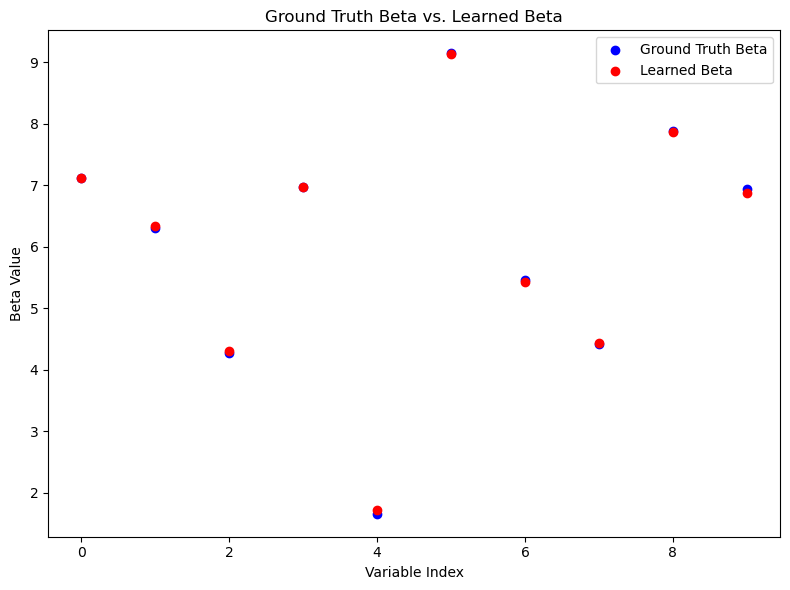

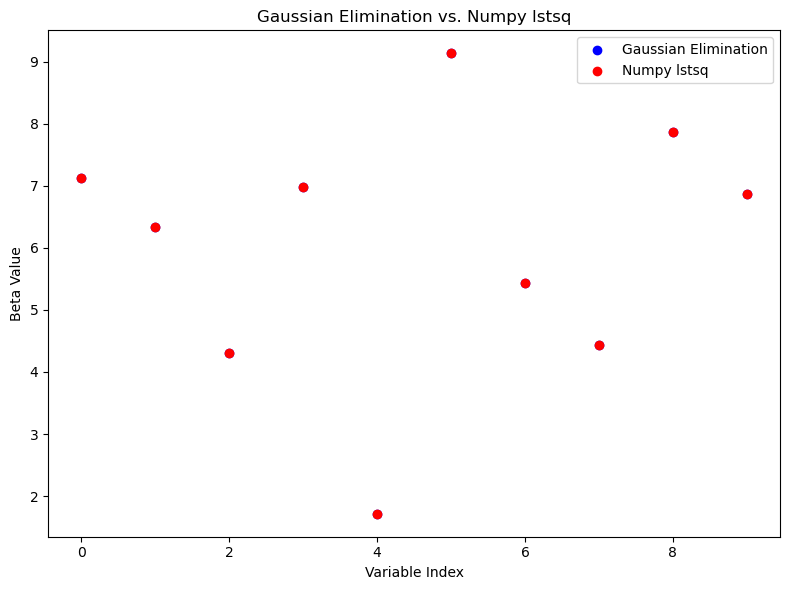

In [12]:
### Write your code here

#Part-1
plt.figure(figsize=(8, 6))

plt.scatter(range(len(Beta)), Beta, color='blue', label='Ground Truth Beta')
plt.scatter(range(len(solution_gaussian)), solution_gaussian, color='red', label='Learned Beta')

plt.xlabel('Variable Index')
plt.ylabel('Beta Value')
plt.title('Ground Truth Beta vs. Learned Beta')
plt.legend()

plt.tight_layout()
plt.show()


#Part-2
# Using numpy's linear least squares solver
beta_pred_lstsq = np.linalg.lstsq(X, Y, rcond=None)

# Visual comparison using a scatter plot
plt.figure(figsize=(8, 6))

# Plotting Gauss-Jordan elimination results vs. numpy's lstsq results
plt.scatter(range(len(solution_gaussian)), solution_gaussian, color='blue', label='Gaussian Elimination')
plt.scatter(range(len(beta_pred_lstsq[0])), beta_pred_lstsq[0], color='red', label='Numpy lstsq')

plt.xlabel('Variable Index')
plt.ylabel('Beta Value')
plt.title('Gaussian Elimination vs. Numpy lstsq')
plt.legend()

plt.tight_layout()
plt.show()

### Part 3

1. **Time Series Exploration**

Try to understand the **"time series.csv"** dataset uploaded along with the exercise. This involves (but is not limited to) plotting the multivariate time series (time on x-axis) clearly labelled and formatted, understanding how the multivariate time series interacts, understanding the correlation between the different variables, plots for variable density functions, identifying inherent seasonality or trend etc.

*(Note: if the different variable are of different scales, it would be better to plot them on different subplots)*

2. **Train/Test split**

As a next step, try to split the data into train and test on 2017-10-24. All days till 2017-10-24 would be in train dataset and the rest would be in test. Draw plots for both time series with appropriate labels. 

3.  **Scaling data**

Perform a standard scaling to scale each variable independently i.e., $$z = \frac{(x-\text{mean}(x))}{\text{std}(x)}$$

The scaling needs to be implement to both train and test data, however the mean and std are only calculated from training data. The training mean and std are then used to scale the test data as well. Explain why only the train dataset should be used to calculate the scaling factors. 


4. **Perform Regression**

Use the $\textbf{learn-linreg-NormEq}$ function form Part 2 here to calculate the beta values using the train dataset.

5. **Evaluation**

Use the learned parameters ($\hat{\beta}$) to calculate the Mean Absolute Error (MAE) on train and test split for the dataset. Additionally, plot the true target and the predicted target for the test split as a time-series.


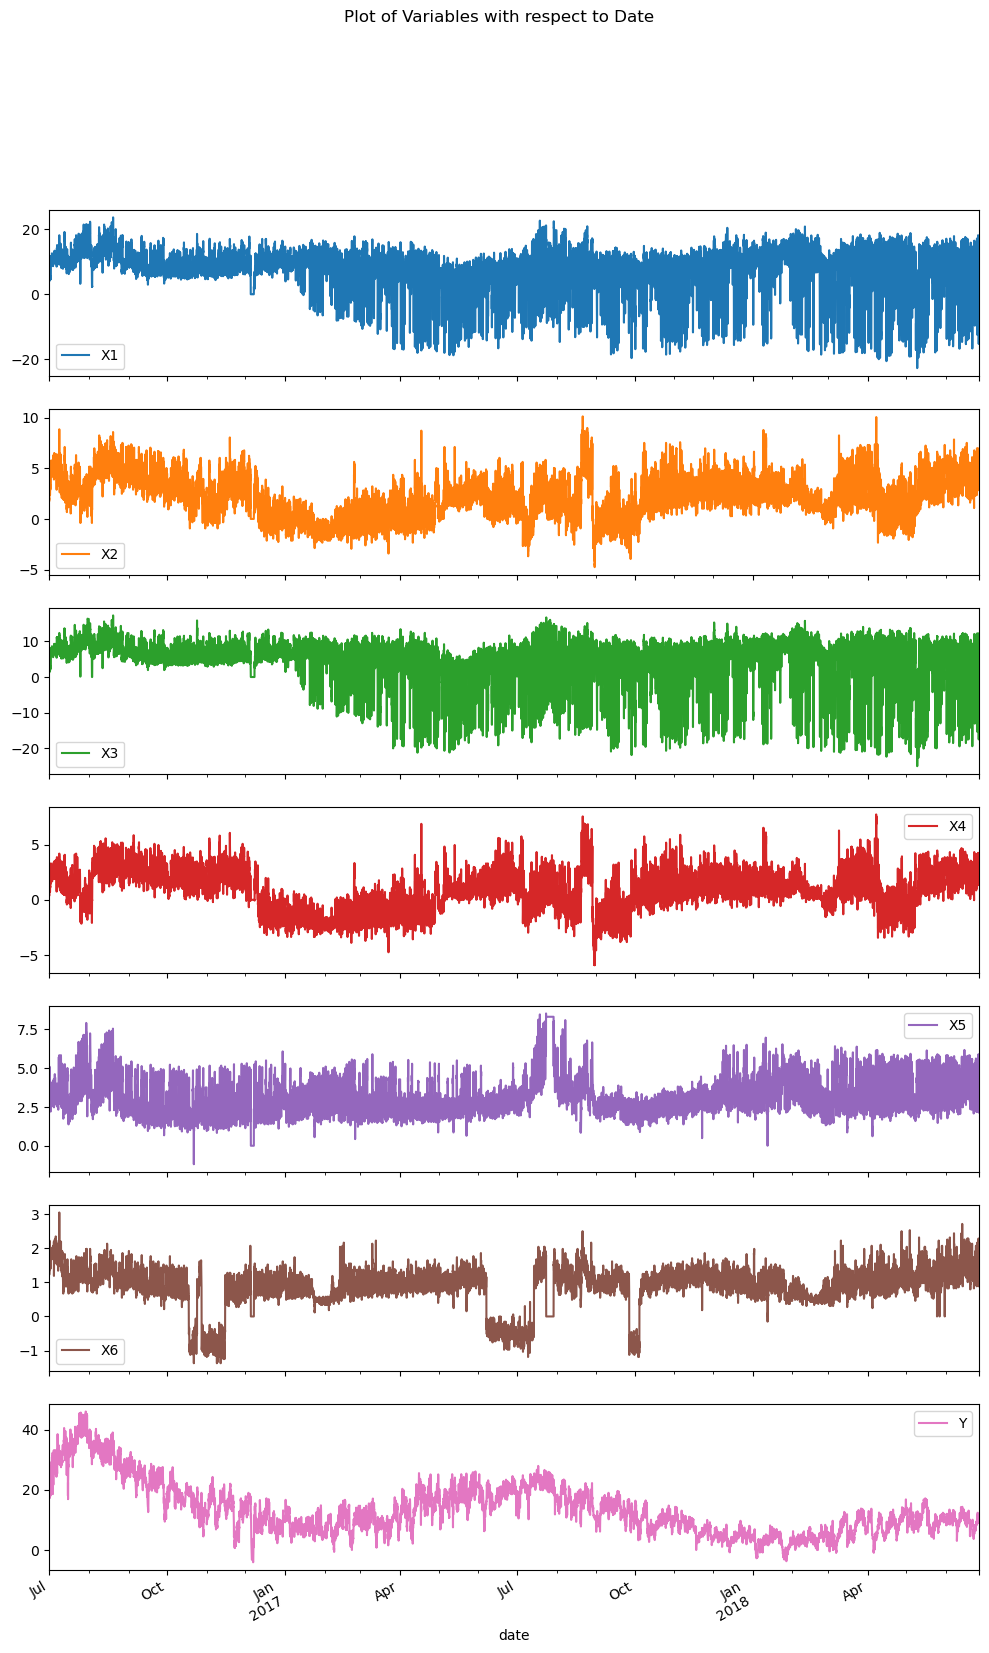

In [13]:
### Write your code here

df = pd.read_csv('time_series.csv')
df['date'] = pd.to_datetime(df['date'])

# make date as index
df = df.set_index('date')

fig, axes = plt.subplots(nrows=7, ncols=1,figsize=(12,20));
ax = df.plot(subplots=True, ax=axes, title='Plot of Variables with respect to Date');
plt.gcf().autofmt_xdate();

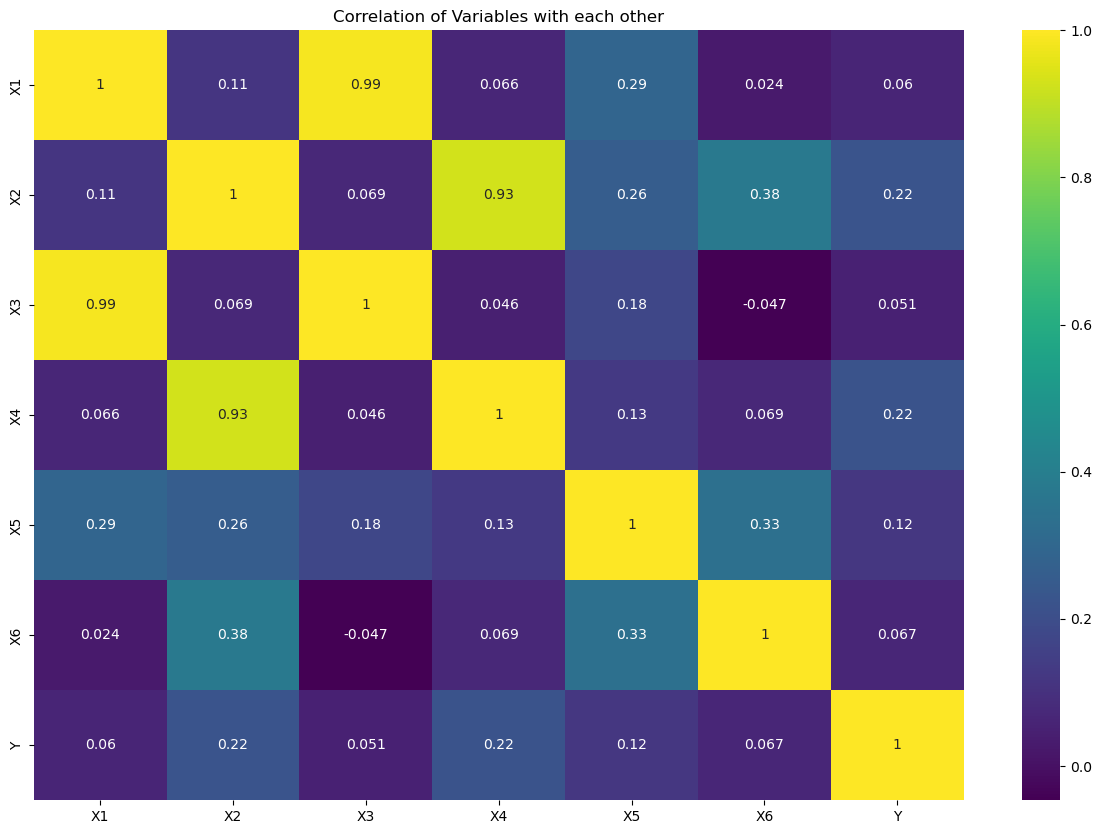

In [14]:
#Heatmap of correlation between variable
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis');
plt.title('Correlation of Variables with each other');

In [15]:
train = df.loc[:'2017-10-25']
test = df.loc['2017-10-25':'2018-02-22']

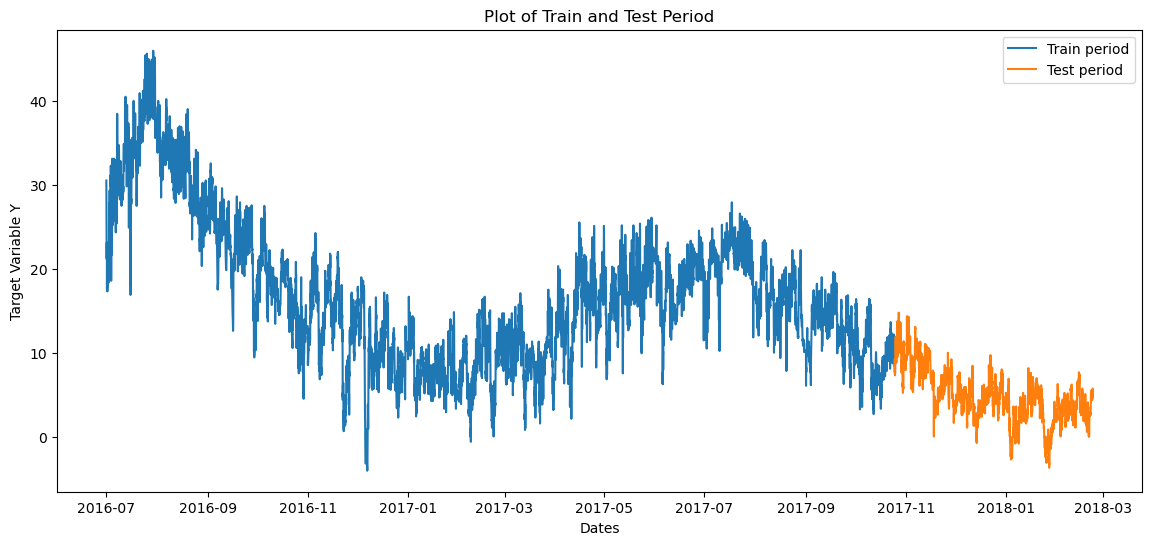

In [16]:
plt.figure(figsize=(14,6))
plt.plot(train.index,train['Y'].values,label='Train period');
plt.plot(test.index,test['Y'].values,label='Test period');
plt.title('Plot of Train and Test Period');
plt.xlabel('Dates');
plt.ylabel('Target Variable Y');
plt.legend();

In [17]:
#scaling only independent variables
def scale_data(df):
    df = df.copy() #make copy to avoid overwriting
    for c in df.columns[:-1]: #iterate over all columns
        df[c] = (df[c] - df[c].mean())/df[c].std() #normalizing the values
    return df

train = scale_data(train)
test = scale_data(test)

X_train, Y_train = train.iloc[:,:-1].values, train.iloc[:,-1].values
X_test, Y_test = test.iloc[:,:-1].values, test.iloc[:,-1].values

In [18]:
learned_beta = learn_linreg_NormEq(X_train, Y_train, method='Gaussian')

Train MAE: 16.720650173916635
Test MAE: 6.194900760191052


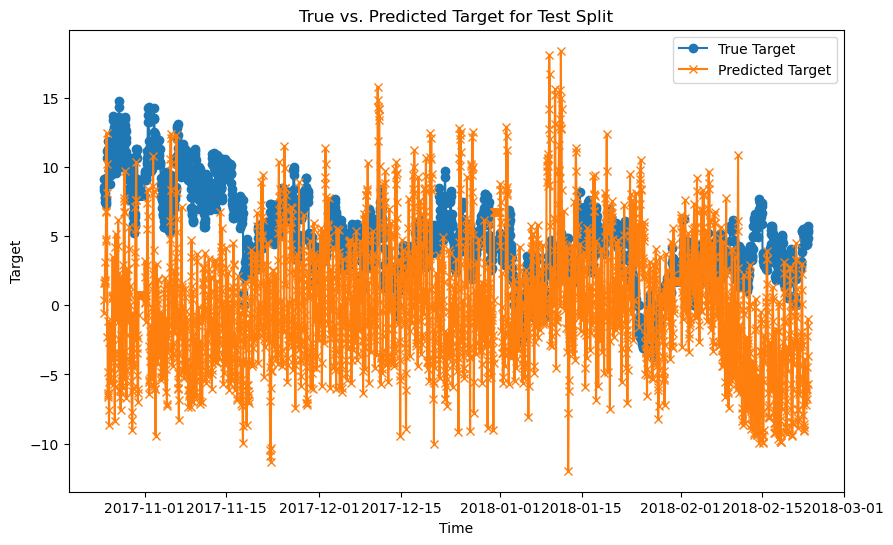

In [19]:
Y_train_pred = np.dot(learned_beta, X_train.T)
Y_test_pred = np.dot(learned_beta, X_test.T)

# Calculating Mean Absolute Error (MAE) for train and test splits
train_mae = np.mean(np.abs(Y_train_pred - Y_train))
test_mae = np.mean(np.abs(Y_test_pred - Y_test))

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

# Plotting True vs. Predicted target for the test split
plt.figure(figsize=(10, 6))
plt.plot(test.index, Y_test, label='True Target', marker='o')
plt.plot(test.index, Y_test_pred, label='Predicted Target', marker='x')
plt.xlabel('Time')
plt.ylabel('Target')
plt.title('True vs. Predicted Target for Test Split')
plt.legend()
plt.show()